# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we study the gauge-Higgs sector

In [150]:
from sympy import symbols, init_printing, I, Add, eye, conjugate, Eq
from sympy import sqrt, sin, cos, tan, trace, solve, Matrix, Function, factor
from sympy.physics import msigma 
from sympy.physics.quantum import Dagger
init_printing()

# Gauge Higgs interactions

In [151]:
from potential_senjanovic_HiggsDoublets import ChiL, ChiR, Phi, change_scalar_fields, complex_scalar_fields

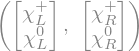

In [152]:
ChiL, ChiR

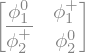

In [153]:
Phi

## Covariant derivative

### Higgs doublets 

In [154]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [155]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

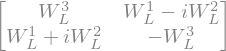

In [156]:
WsigmaL

In [157]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [158]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

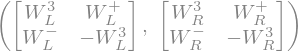

In [159]:
WsigmaL, WsigmaR

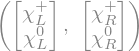

In [160]:
ChiL, ChiR

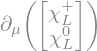

In [161]:
partial_mu = Function(r'\partial_\mu')
partial_mu(ChiL)

In [162]:
from potential_senjanovic_HiggsDoublets import chiL0, chiR0, chiLp, chiLm, chiRp, chiRm

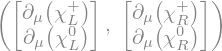

In [163]:
partial_mu_L = Matrix(
    [
        [partial_mu(chiLp)],
        [partial_mu(chiL0)],

    ]
)
partial_mu_R = Matrix(
    [
        [partial_mu(chiRp)],
        [partial_mu(chiR0)]
    ]
)
partial_mu_L, partial_mu_R

In [164]:
DmuL = - I*g/2*WsigmaL - I*gBL/2*Bmu*eye(2)
DmuR = - I*g/2*WsigmaR - I*gBL/2*Bmu*eye(2)

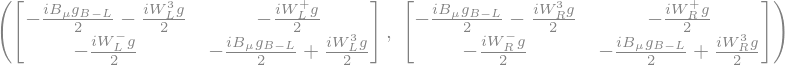

In [165]:
DmuL, DmuR

In [166]:
Dmu_ChiL = partial_mu_L +  DmuL*ChiL 
Dmu_ChiR = partial_mu_R + DmuR*ChiR

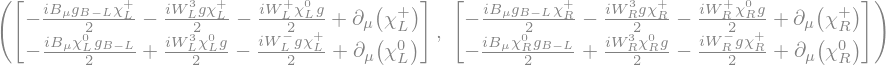

In [167]:
Dmu_ChiL.applyfunc(lambda x:x.expand()), Dmu_ChiR.applyfunc(lambda x:x.expand())

In [168]:
conjugate_fields = {
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    conjugate(chiL0): chiL0,
    conjugate(chiR0): chiR0,
    conjugate(chiLp): chiLm,
    conjugate(chiLm): chiLp,
    conjugate(chiRm): chiRp,
    conjugate(chiRp): chiRm,
    conjugate(partial_mu(chiL0)): partial_mu(chiL0),
    conjugate(partial_mu(chiR0)): partial_mu(chiR0),
    conjugate(partial_mu(chiLp)): partial_mu(chiLm),
    conjugate(partial_mu(chiLm)): partial_mu(chiLp),
    conjugate(partial_mu(chiRm)): partial_mu(chiRp),
    conjugate(partial_mu(chiRp)): partial_mu(chiRm)
}

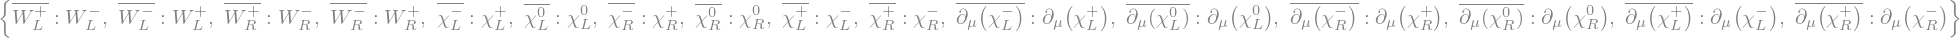

In [169]:
conjugate_fields

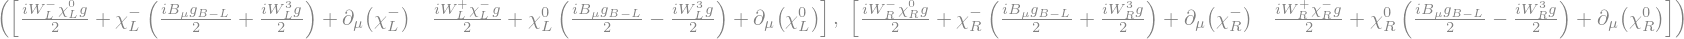

In [170]:
Dmu_ChiL_dagger = Dagger(Dmu_ChiL).subs(conjugate_fields)
Dmu_ChiR_dagger = Dagger(Dmu_ChiR).subs(conjugate_fields)

Dmu_ChiL_dagger, Dmu_ChiR_dagger

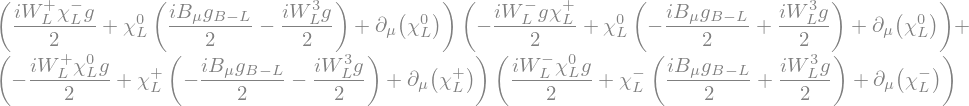

In [171]:
Dmu_ChiL_square = (Dmu_ChiL_dagger*Dmu_ChiL)[0]
Dmu_ChiL_square


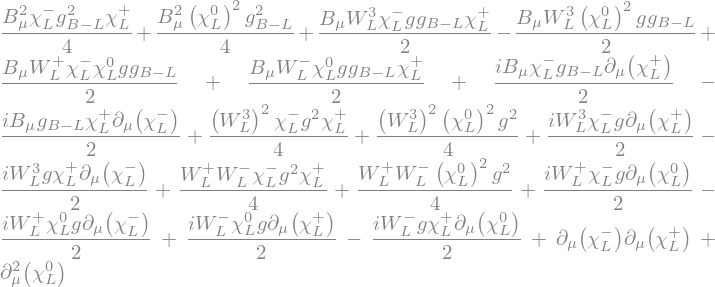

In [172]:
Dmu_ChiL_square.expand()

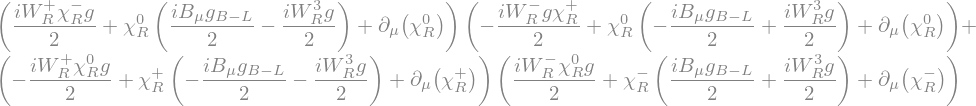

In [173]:
Dmu_ChiR_square = (Dmu_ChiR_dagger*Dmu_ChiR)[0]
Dmu_ChiR_square

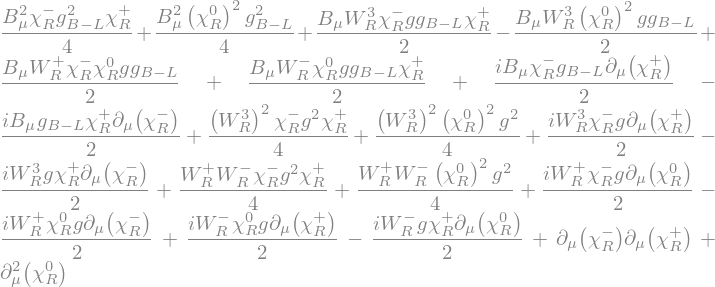

In [174]:
Dmu_ChiR_square.expand()

### Bidoublet

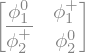

In [175]:
Phi

In [176]:
from potential_senjanovic_HiggsDoublets import phi10, phi20, phi1p, phi1m, phi2p, phi2m

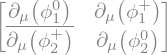

In [177]:
partial_mu_Phi = Matrix(
    [
        [partial_mu(phi10), partial_mu(phi1p)],
        [conjugate(partial_mu(phi2p)), partial_mu(phi20)],

    ]
)
partial_mu_Phi

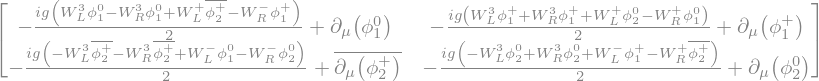

In [178]:
Dmu_Phi = partial_mu_Phi -I*g/2*(WsigmaL*Phi - Phi*WsigmaR).subs(conjugate_fields) # B - L = 0 for the bidoublet
Dmu_Phi

In [179]:
conjugate_scalarsPhi = {
    conjugate(phi10):phi10,
    conjugate(phi20):phi20,
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p,
    conjugate(partial_mu(phi10)):partial_mu(phi10),
    conjugate(partial_mu(phi20)):partial_mu(phi20),
    conjugate(partial_mu(phi1p)):partial_mu(phi1m),
    conjugate(partial_mu(phi2p)):partial_mu(phi2m),
    conjugate(partial_mu(phi1m)):partial_mu(phi1p),
    conjugate(partial_mu(phi2m)):partial_mu(phi2p)
}

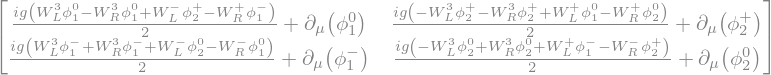

In [184]:
Dmu_Phi_dagger = Dagger(Dmu_Phi).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

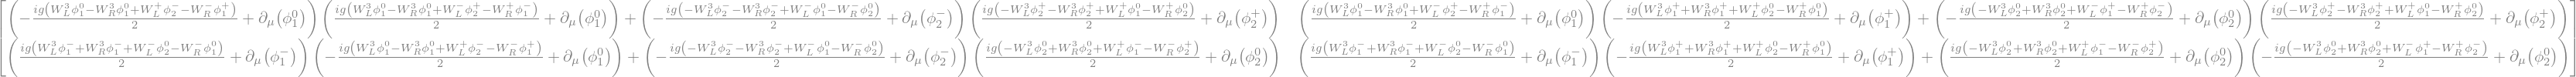

In [185]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(conjugate_scalarsPhi)#.subs(vevPhi)
Dmu_Phi_Dmu

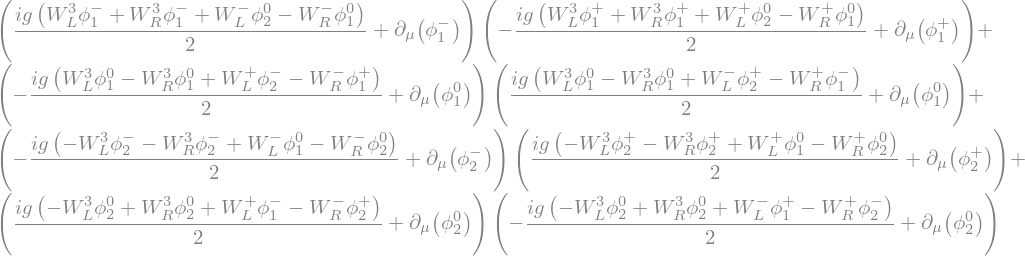

In [186]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu)
Tr_DmuPhi 

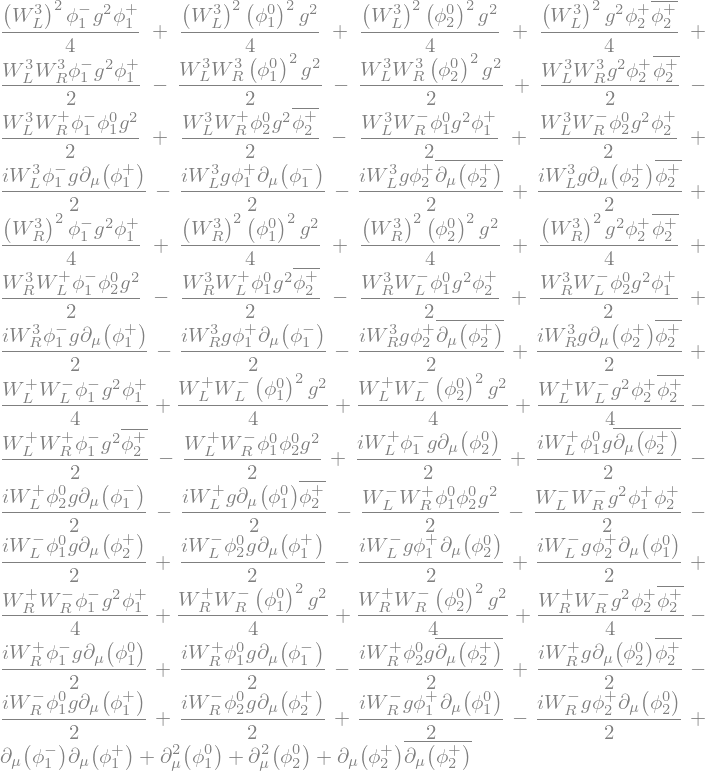

In [183]:
Tr_DmuPhi.expand()

## Kinetic Lagrangian of scalars

In [38]:
LHiggs = Dmu_ChiL_square + Dmu_ChiR_square + Tr_DmuPhi 

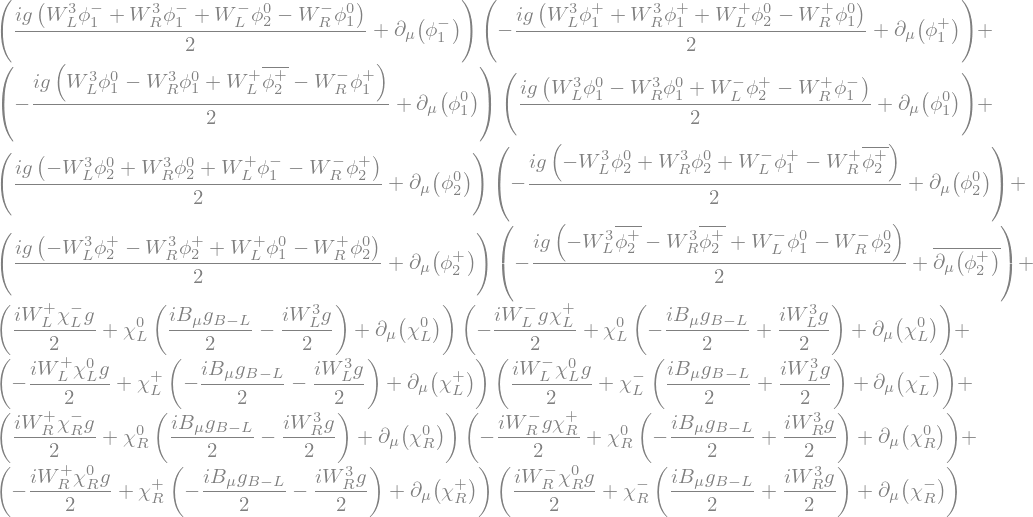

In [39]:
LHiggs

### $W^\pm$ mass matrix

In [40]:
LHiggs.free_symbols

In [ ]:
from potential_senjanovic_HiggsDoublets import vevL, vevR, vevPhi, k1, k2, vL, vR

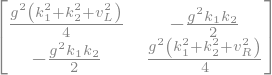

In [42]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
).subs(vevPhi).subs(vevL).subs(vevR)
MW

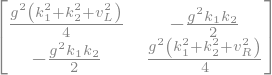

In [43]:
MW11_k2_0 = LHiggs.diff(WLm, WLp).subs(k2, 0)
MW12_k2_0 = LHiggs.diff(WLm, WRp).subs(k2, 0)
MW21_k2_0 = LHiggs.diff(WRm, WLp).subs(k2, 0)
MW22_k2_0 = LHiggs.diff(WRm, WRp).subs(k2, 0)

MW_k2_0 = Matrix(
    [
        [MW11_k2_0, MW12_k2_0],
        [MW21_k2_0, MW22_k2_0]
    ]
).subs(vevPhi).subs(vevL).subs(vevR)
MW_k2_0

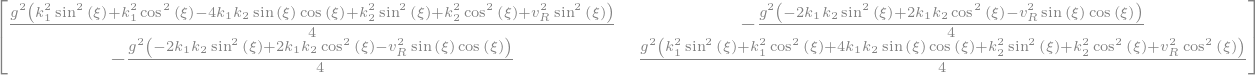

In [44]:
xi = symbols(r'\xi')
Oxi = Matrix(
    [
        [cos(xi), -sin(xi)],
        [sin(xi), cos(xi)]
    ]
)

MW_rotate = (Oxi.T*MW.subs(vL,0)*Oxi).applyfunc(factor)
MW_rotate

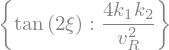

In [45]:
sin2xi_sol = solve(MW_rotate[0,1].trigsimp(), sin(2*xi), dict=True)[0]
sin2xi_sol
tan2xi_sol = {tan(2*xi): (sin(2*xi)/cos(2*xi)).subs(sin2xi_sol)}
tan2xi_sol

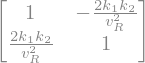

In [46]:
Oxi_approx = Oxi.subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).subs(cos(xi), 1)
Oxi_approx

Then, we have a mixing amon two charged gauge bosons
$$
W_{L}^{\pm}=	\cos\left(\xi\right)W_{1}^{+}-\sin\left(\xi\right)W_{2}^{+}\\
W_{R}^{\pm}=	\cos\left(\xi\right)W_{2}^{+}+\sin\left(\xi\right)W_{1}^{+}
$$

In [145]:
W1p, W2p = symbols('W_1^+, W_2^+')
W1m, W2m = symbols('W_1^-, W_2^-')

W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
mixingW12 = Oxi*W12p_doublet
mixingW12
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In [48]:
change_charged_bosons = {
    WLp:WLp_mix, WRp:WRp_mix,
    WLm:WLp_mix.subs(W1p, W1m).subs(W2p, W2m), WRm:WRp_mix.subs(W1p, W1m).subs(W2p, W2m)
}
change_charged_bosons

### Neutral gaube bosons

In [49]:
from symbolic_tools import build_mass_matrix

In [50]:
WLWRB = [W3L, W3R, Bmu]
M0_square = build_mass_matrix(LHiggs, WLWRB, WLWRB).applyfunc(lambda x:x.simplify())/2
M0_square = M0_square.subs(vevPhi).subs(vevL).subs(vevR)

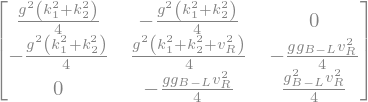

In [51]:
M0_square_vL0 = M0_square.applyfunc(factor).subs(vL,0)
M0_square_vL0

In [52]:
M0_square_vL0.det()

In [53]:
M0_eigenvals = M0_square_vL0.eigenvals()

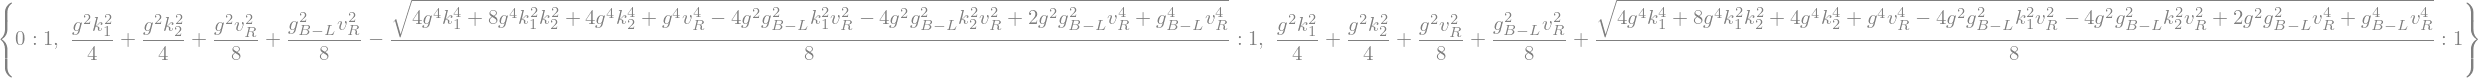

In [54]:
M0_eigenvals

In [55]:
M0_eigenvects = M0_square_vL0.eigenvects()

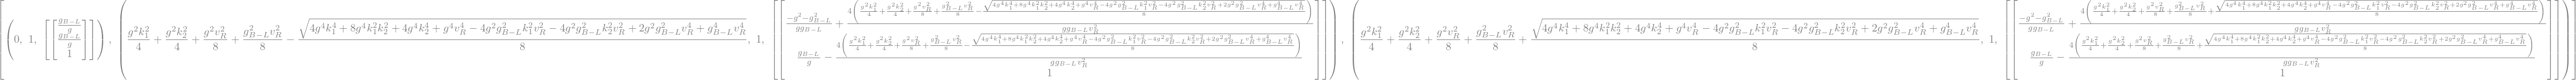

In [56]:
M0_eigenvects

In [57]:
P0 = Matrix.hstack(*[eigeninfo[2][0]/(eigeninfo[2][0]).norm() for eigeninfo in M0_eigenvects])


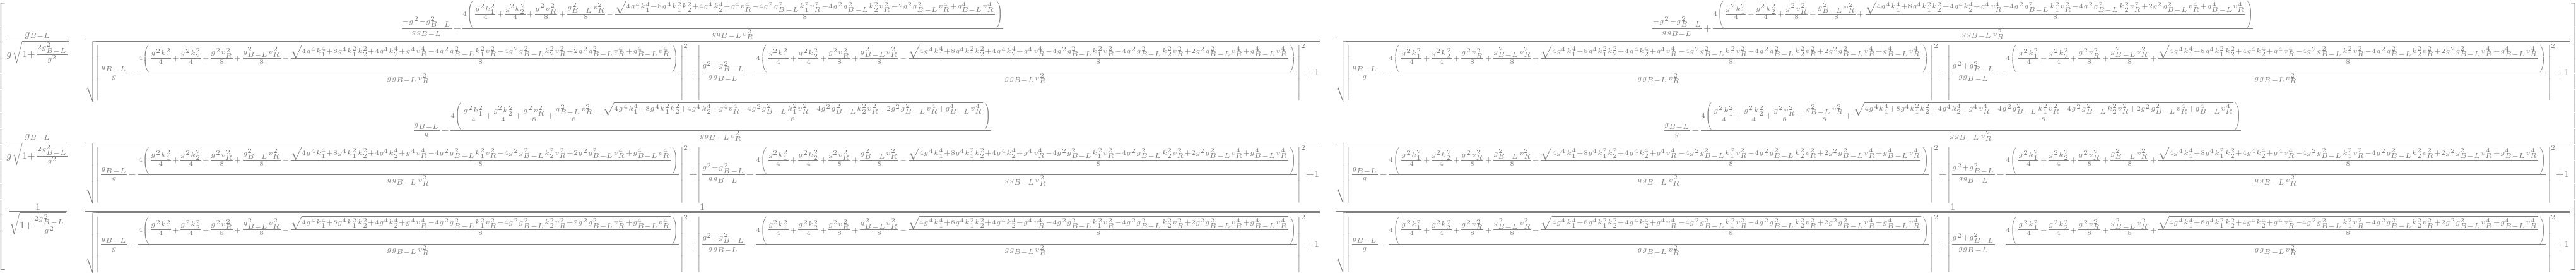

In [58]:
P0

In [59]:
from potential_senjanovic_HiggsDoublets import epsilon

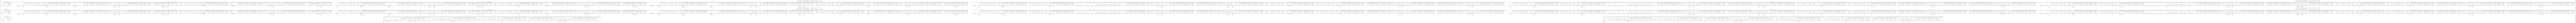

In [60]:
P0_approx = P0.applyfunc(
    lambda x: x.subs(k1, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k1/vR)
).applyfunc(
    lambda x: x.subs(k2, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k2/vR)
)
P0_approx

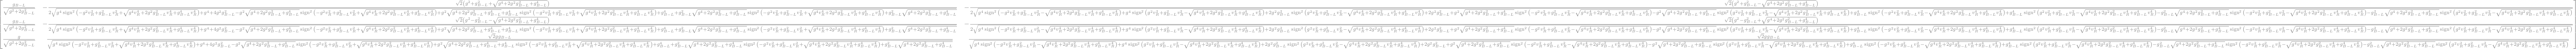

In [ ]:
#P0_approx.applyfunc(factor)

In [61]:
sqrt_P0 = P0_approx[0,1].args[0].args[3].args[0].args[3].args[-1].args[0].args[0].args[0].args[0]
sqrt_P0

In [62]:
sqrt_P0_factor = sqrt_P0.factor()
sqrt_P0_factor

In [63]:
P0_approx = P0_approx.subs(sqrt_P0, sqrt_P0_factor).applyfunc(factor)

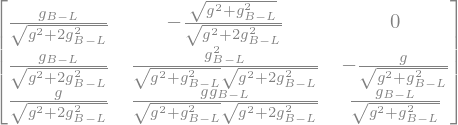

In [64]:
P0_approx

In [ ]:
#v1 = (P0_approx.col(0)/P0_approx.col(0).norm()).applyfunc(factor)
#v2 = (P0_approx.col(1)/P0_approx.col(1).norm()).applyfunc(factor)
#v3 = (P0_approx.col(2)/P0_approx.col(2).norm()).applyfunc(factor)

In [66]:
#v2#.subs(g_changes).applyfunc(lambda x:x.trigsimp())

In [ ]:
#P0_approx2 = Matrix.hstack(v1, v2, v3)

In [65]:
#P0_approx2

with the definition $e = g \sin{\theta_W}$ and 
$$\frac{1}{e^2} = \frac{2}{g^2} + \frac{1}{g_{B-L}^2}$$

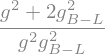

In [67]:
e_square_inv = (2/g**2+ 1/gBL**2).factor()
e_square_inv

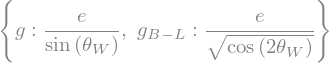

In [68]:
e = symbols('e', positive=True)
thw = symbols(r'\theta_W')
g_changes = {
    g:e/sin(thw),
    gBL:e/sqrt(cos(2*thw))
}
g_changes

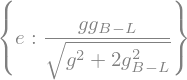

In [71]:
e_sol = solve(Eq(1/e**2, e_square_inv), e, dict=True)[0]
e_sol

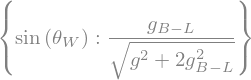

In [72]:
sinthw_sol_ggBL =  solve((1/e).subs(e_sol) - 1/(g*sin(thw)), sin(thw), dict=True)[0]
sinthw_sol_ggBL

Remember the trigonometric identity $\cos{\theta_W}^2 = 1 - \sin{\theta_W}^2$

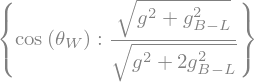

In [73]:
costhw_sol_ggBL = solve(Eq(cos(thw)**2, (1-sin(thw)**2).subs(sinthw_sol_ggBL)), cos(thw), dict=True)[1]
costhw_sol_ggBL

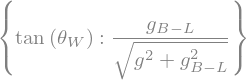

In [74]:
tanthw_sol_ggBL = {tan(thw): (sin(thw)/cos(thw)).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)}
tanthw_sol_ggBL

Also, with the identity $\cos{2\theta_W} = \cos{\theta_W}^2 - \sin{\theta_W}^2$

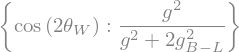

In [75]:
cos2thw_sol_ggBL = solve(
    Eq(cos(2*thw), (cos(thw)**2 - sin(thw)**2).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)), 
    cos(2*thw), dict=True
)[0]
cos2thw_sol_ggBL

In [76]:
cos2thw_sol_ggBL[sqrt(cos(2*thw))] = sqrt(cos2thw_sol_ggBL[cos(2*thw)])

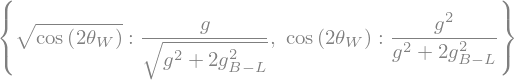

In [77]:
cos2thw_sol_ggBL

Finally, we have $1 - \tan^2{\theta_W} = 1 - \frac{\sin^2{\theta_W}}{\cos^2{\theta_W}}=\frac{\cos^2{\theta_W} - \sin^2{\theta_W}}{\cos^2{\theta_W}} = \frac{\cos{2\theta_W}}{\cos^2{\theta_W}}$

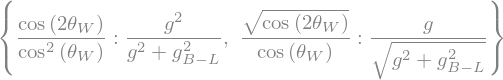

In [78]:
cos2thw_cosW_square_sol_ggBL = {
    cos(2*thw)/cos(thw)**2: (cos(2*thw)/cos(thw)**2).subs(cos2thw_sol_ggBL).subs(costhw_sol_ggBL)
}
cos2thw_cosW_square_sol_ggBL[sqrt(cos(2*thw))/cos(thw)] = sqrt(cos2thw_cosW_square_sol_ggBL[cos(2*thw)/cos(thw)**2]).expand()
cos2thw_cosW_square_sol_ggBL


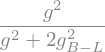

In [79]:
(1-2*sin(thw)**2).subs(sinthw_sol_ggBL).simplify()

In [146]:
from symbolic_tools import invert_dict

ImportError: cannot import name 'invert_dict' from 'symbolic_tools' (c:\Users\moise\OneDrive\Escritorio\LRSM-with-Spheno\sympy_calculations\DLRSM\symbolic_tools.py)

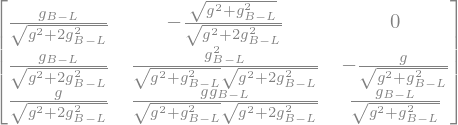

In [147]:
P0_approx

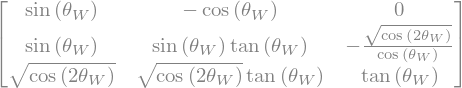

In [148]:
P0_approx2_angles = P0_approx.subs(
    invert_dict(costhw_sol_ggBL)
).subs(
    invert_dict(sinthw_sol_ggBL)
).subs(
    invert_dict(tanthw_sol_ggBL)
).subs(
    invert_dict(cos2thw_cosW_square_sol_ggBL)
).applyfunc(lambda x:x.trigsimp()).subs(
    invert_dict(cos2thw_sol_ggBL)
)
P0_approx2_angles


In [83]:
P0_approx2_angles_inv = P0_approx2_angles.inv().applyfunc(lambda x:x.trigsimp()) #P0_approx2.inv()

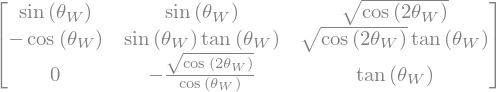

In [84]:
P0_approx2_angles_inv

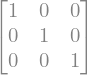

In [85]:
(P0_approx2_angles_inv*P0_approx2_angles).applyfunc(
    lambda x:x.trigsimp().collect(tan(thw)**2, lambda x:x.trigsimp().collect(cos(thw)**2, factor))
).subs(
    tan(thw)**2, 1/cos(thw)**2 - 1
).applyfunc(factor)

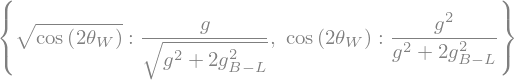

In [86]:
cos2thw_sol_ggBL

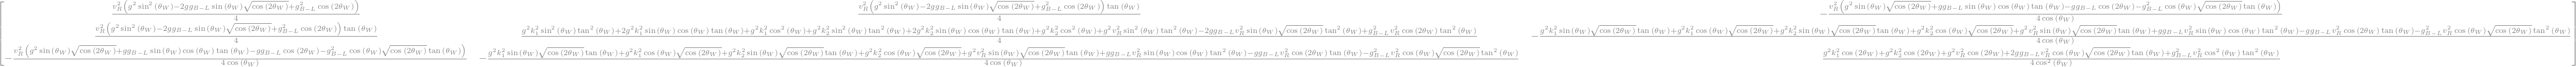

In [87]:
M0_square_vL0_rotation1 = (P0_approx2_angles_inv*M0_square_vL0*P0_approx2_angles).applyfunc(factor)
M0_square_vL0_rotation1

In [88]:
M0_square_vL0_rotation1[0,0] = M0_square_vL0_rotation1[0,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [89]:
M0_square_vL0_rotation1[0,1] = M0_square_vL0_rotation1[0,1].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [90]:
M0_square_vL0_rotation1[0,2] = M0_square_vL0_rotation1[0,2].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [91]:
M0_square_vL0_rotation1[1,0] = M0_square_vL0_rotation1[1,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [92]:
M0_square_vL0_rotation1[2,0] = M0_square_vL0_rotation1[2,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

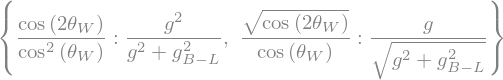

In [93]:
cos2thw_cosW_square_sol_ggBL

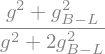

In [94]:
costhw_sol_ggBL[cos(thw)]**2

In [95]:
M0_square_vL0_rotation1[1,1] = (M0_square_vL0_rotation1[1,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True)*4/(g**2*(k1**2 + k2**2))).subs(
    1/costhw_sol_ggBL[cos(thw)]**2, 1/cos(thw)**2
)*((g**2*(k1**2 + k2**2))/4)

In [96]:
M0_square_vL0_rotation1[1,2] = M0_square_vL0_rotation1[1,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [97]:
M0_square_vL0_rotation1[2,1] = M0_square_vL0_rotation1[2,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [98]:
M0_square_vL0_rotation1[2,2] = M0_square_vL0_rotation1[2,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).collect(vR, factor).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).expand().collect(vR, factor)

With the identity $sin^2{\theta_W} = \frac{1}{2}(1 - \cos{2\theta_W})$

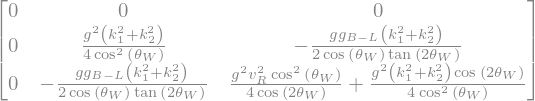

In [100]:
M0_square_vL0_rotation1

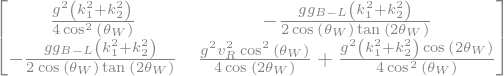

In [101]:
m0_square_vL0_rotation1 = M0_square_vL0_rotation1[1:, 1:]
m0_square_vL0_rotation1

In [102]:
mZ1, mZ2 = list(m0_square_vL0_rotation1.eigenvals().keys())

In [103]:
mZ12_plus = mZ1 + mZ2
mZ12_minus = mZ2 - mZ1

In [104]:
mz12_sqrt = mZ12_minus.args[3].args[0]

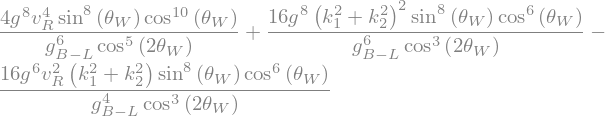

In [105]:
mz12_sqrt_simplify = mz12_sqrt.factor(deep=True).expand(trig=True).subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).expand().collect(vR, factor).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
)
mz12_sqrt_simplify

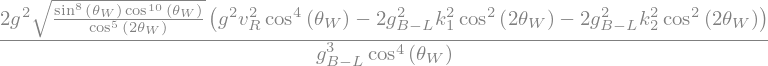

In [106]:
mz12_sqrt_simplify_high_approx = sqrt(mz12_sqrt_simplify).subs(k1**2 + k2**2, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(
    epsilon, (k1**2 + k2**2)/vR
).factor()
mz12_sqrt_simplify_high_approx

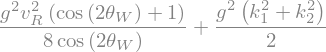

In [107]:
mZ12_plus_simplify = mZ12_plus.expand().collect(vR, factor).subs(cos(thw)**2, (1 + cos(2*thw))/2).collect(vR, factor)
mZ12_plus_simplify

In [108]:
mZ1 = mZ1.subs(mZ12_plus, mZ12_plus_simplify).subs(
    sqrt(mz12_sqrt), mz12_sqrt_simplify_high_approx
)
mZ2 = mZ2.subs(mZ12_plus, mZ12_plus_simplify).subs(
    sqrt(mz12_sqrt), mz12_sqrt_simplify_high_approx
)

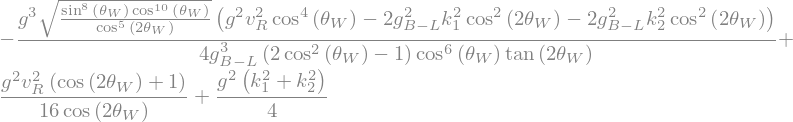

In [109]:
mZ1

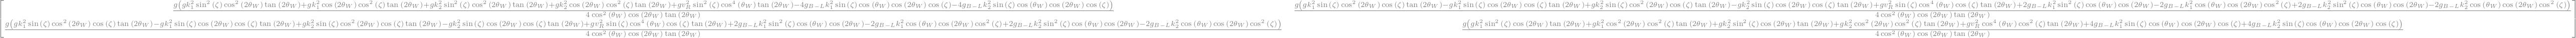

In [110]:
zeta = symbols(r'\zeta')
Ozeta = Matrix(
    [
        [cos(zeta), -sin(zeta)],
        [sin(zeta), cos(zeta)]
    ]
)

m0_rotate = (Ozeta.T*m0_square_vL0_rotation1*Ozeta).applyfunc(factor)
m0_rotate

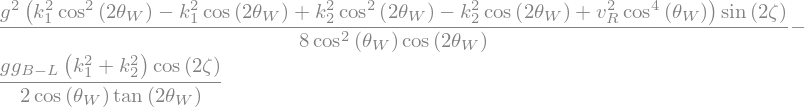

In [111]:
m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor())

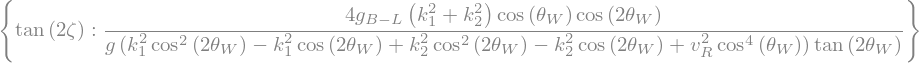

In [112]:
sin2zeta_sol = solve(m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor()), 
sin(2*zeta), dict=True)[0]
#sin2zeta_sol
tan2zeta_sol = {tan(2*zeta): (sin(2*zeta)/cos(2*zeta)).subs(sin2zeta_sol).factor()}
tan2zeta_sol


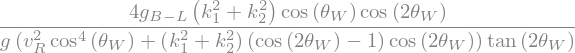

In [113]:
tan2zeta_sol[tan(2*zeta)].collect(vR,factor)

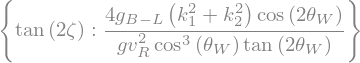

In [114]:
tan2zeta_sol_approx = {tan(2*zeta):tan2zeta_sol[tan(2*zeta)].collect(vR,factor).subs((k1**2 + k2**2), epsilon*vR).series(
    x=epsilon, x0=0, n=2
).removeO().subs(epsilon, (k1**2 + k2**2)/vR)}
tan2zeta_sol_approx

## Mixing among neutral gauge bosons

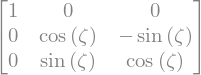

In [115]:
Ozeta3d = Matrix(
    [
        [1, 0, 0],
        [0, Ozeta[0,0], Ozeta[0,1]],
        [0, Ozeta[1,0], Ozeta[1,1]]
    ]
)
Ozeta3d

In [116]:
P0 = Ozeta3d*P0_approx2_angles

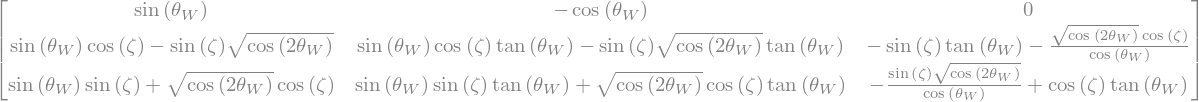

In [117]:
P0

In [118]:
P0_inv = P0_approx2_angles_inv*Ozeta3d.inv()

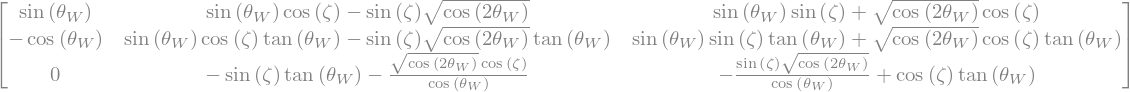

In [149]:
P0_inv = P0_inv.applyfunc(lambda x:x.trigsimp())
P0_inv

In [120]:
#thw, phi = symbols(r'\theta_W, phi')
#cw, sw = cos(thw), sin(thw)
#sM = tan(thw)
#cM = sqrt(cos(2*thw))/cos(thw)
#cphi, sphi = cos(phi), sin(phi)
#R0 = Matrix(
#    [
#        [cw*cphi, cw*sphi, sw],
#        [-sw*sM*cphi - cM*sphi, -sw*sM*sphi + cM*cphi, cw*sM],
#        [-sw*cM*cphi + sM*sphi, -sw*cM*sphi - sM*cphi, cw*cM]
#    ]
#)
#R0

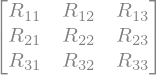

In [121]:
R11, R12, R13 = symbols('R_{11}, R_{12}, R_{13}', real=True)
R21, R22, R23 = symbols('R_{21}, R_{22}, R_{23}', real=True)
R31, R32, R33 = symbols('R_{31}, R_{32}, R_{33}', real=True)

R = Matrix(
    [
        [R11, R12, R13],
        [R21, R22, R23],
        [R31, R32, R33]
    ]
)
R

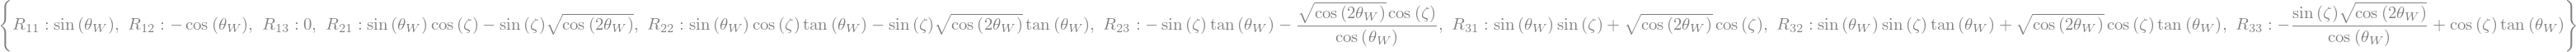

In [122]:
changes_R_neutral_bosons = {r:o for r, o in zip(list(R), list(P0))}
changes_R_neutral_bosons

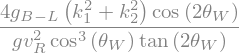

In [123]:
tan2zeta_sol_approx[tan(2*zeta)].subs(invert_dict(changes_R_neutral_bosons))

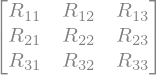

In [124]:
P0R = R
P0R

In [129]:
Z1, Z2, A = symbols('Z1, Z2, A', real=True)

mixingZ12A = P0*Matrix([
    [A],
    [Z1],
    [Z2]
])
mixingZ12A_R = P0R*Matrix([
    [A],
    [Z1],
    [Z2]
])

In [130]:
W3L_mix = mixingZ12A[0]
W3R_mix = mixingZ12A[1]
B_mix = mixingZ12A[2]

W3L_mix_R = mixingZ12A_R[0]
W3R_mix_R = mixingZ12A_R[1]
B_mix_R = mixingZ12A_R[2]

W3L_mix_R.subs(R13, 0), W3R_mix_R, B_mix_R

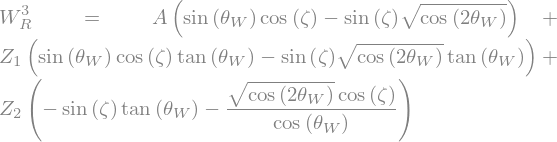

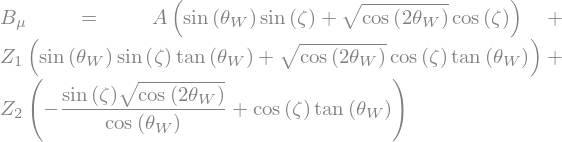

In [131]:
change_neutral_bosons = {W3L:W3L_mix, W3R:W3R_mix, Bmu:B_mix}
change_neutral_bosons_R = {W3L:W3L_mix_R, W3R:W3R_mix_R, Bmu:B_mix_R}
for field, mixing in change_neutral_bosons.items():
    display(Eq(field, mixing))

In [133]:
for field, mixing in change_neutral_bosons_R.items():
    display(Eq(field, mixing.subs(R13, 0)))

## Physical basis LHiggs

In [134]:
change_charged_bosons

In [135]:
change_neutral_bosons_R

In [136]:
LHiggs.free_symbols

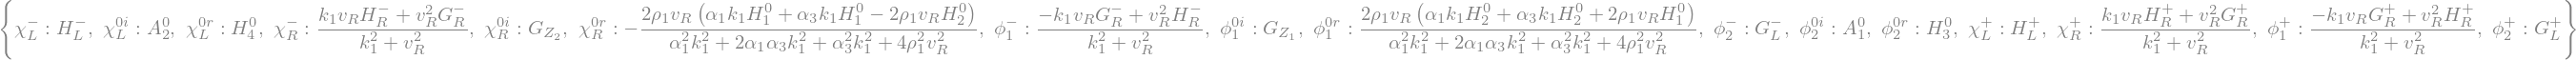

In [137]:
change_scalar_fields

In [143]:
LHiggs_physical = LHiggs.subs(
    change_charged_bosons
).subs(
    change_neutral_bosons_R
).subs(
    complex_scalar_fields
).subs(
    change_scalar_fields
)

In [144]:
LHiggs_physical.free_symbols